<a href="https://colab.research.google.com/github/sanchezduvanricardo/portafolio/blob/main/ArbolesDecisionUNAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos
#from google.colab import files
#uploaded = files.upload()  # Te permite subir archivos desde tu PC
Datos = pd.read_csv("winequality-red.csv")

In [4]:

Datos.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**1. Realizar un análisis exploratorio de los datos para identificar**

In [5]:
Datos.shape

(1599, 12)

In [6]:
# Descripción de los datos
Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Ver cantidad de valores nulos por columna
Datos.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<ipython-input-8-24f5f1f5989b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Datos["quality"], palette="viridis")


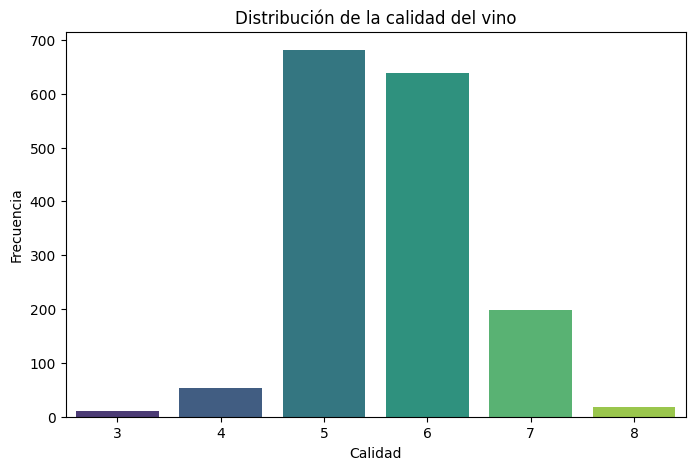

In [8]:
#Observamos el histograma de las calidades de vino que tenemos
# Visualizar la distribución de la variable objetivo (quality)
plt.figure(figsize=(8,5))
sns.countplot(x=Datos["quality"], palette="viridis")
plt.title("Distribución de la calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

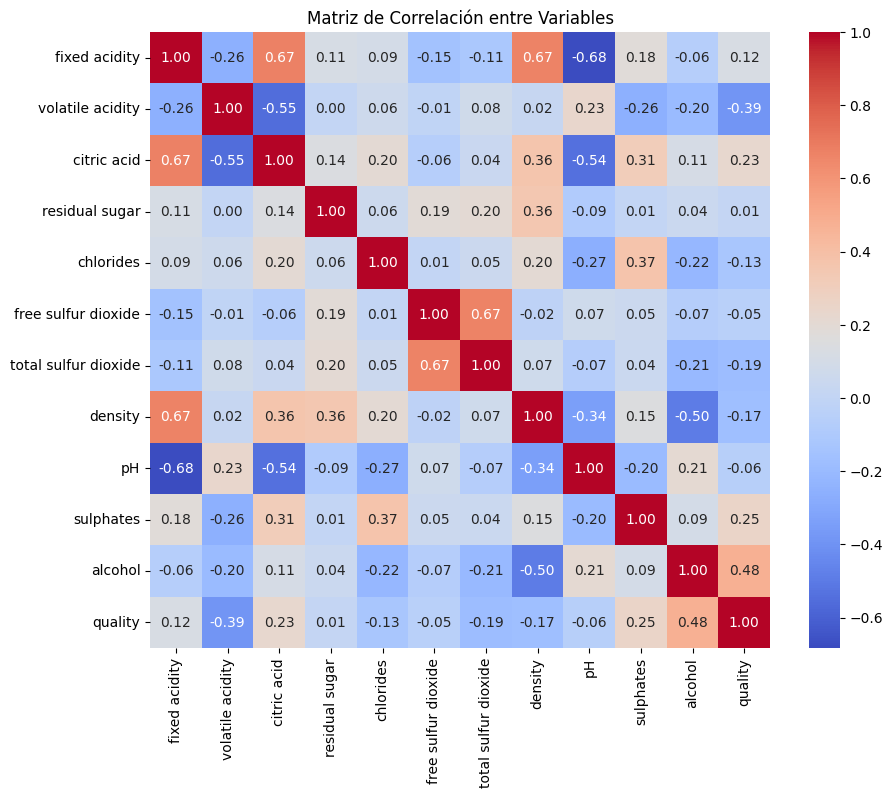

In [9]:
#Observamos la correlacion de las variables
plt.figure(figsize=(10,8))
sns.heatmap(Datos.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.**

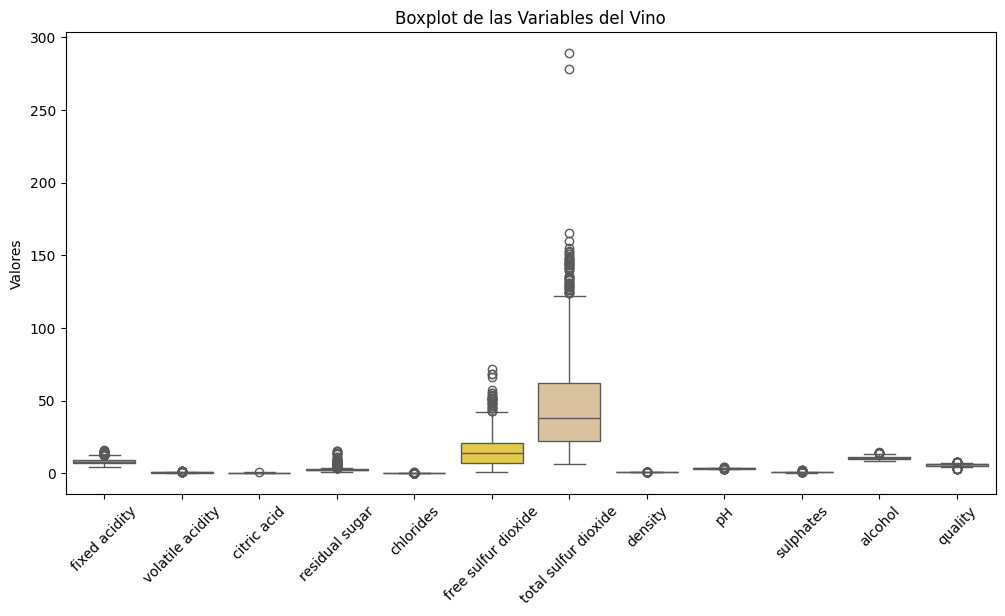

In [10]:
# Gráfico de Boxplot para todas las variables fisicoquímicas
plt.figure(figsize=(12,6))
sns.boxplot(data=Datos, palette="Set2")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.title("Boxplot de las Variables del Vino")
plt.ylabel("Valores")
plt.show()


In [11]:
#Calcular cuartiles e IQR
Q1 = Datos.quantile(0.25)
Q3 = Datos.quantile(0.75)
IQR = Q3 - Q1

#Detectar valores atípicos (fuera del rango esperado)
outliers = ((Datos < (Q1 - 1.5 * IQR)) |
            (Datos > (Q3 + 1.5 * IQR)))

#Contar valores atípicos por variable
print("Número de valores atípicos por variable:\n", outliers.sum())

#Mostrar los valores atípicos detectados
#for col in Datos:
 #   valores_outliers = Datos.loc[outliers[col], col].unique()
 #   if len(valores_outliers) > 0:
  #      print(f"Valores atípicos en {col}: {valores_outliers}")

Número de valores atípicos por variable:
 fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64


In [12]:
#Función para reemplazar outliers por el límite superior (Q3 + 1.5*IQR)
def ajustar_outliers(Datos, columna):
    Q1 = Datos[columna].quantile(0.25)
    Q3 = Datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral_alto = Q3 + 1.5 * IQR  # Límite superior
    Datos[columna] = np.where(Datos[columna] > umbral_alto, umbral_alto, Datos[columna])

#Aplicamos la función de ajuste solo a las variables con outliers identificados
#ajustar_outliers(Datos, 'chlorides')
#ajustar_outliers(Datos, 'fixed acidity')
#ajustar_outliers(Datos, 'sulphates')
ajustar_outliers(Datos, 'free sulfur dioxide')
ajustar_outliers(Datos, 'total sulfur dioxide')
ajustar_outliers(Datos, 'residual sugar')

print("Valores atípicos ajustados en 'free sulfur dioxide', 'total sulfur dioxide' y 'residual sugar'.")

Valores atípicos ajustados en 'free sulfur dioxide', 'total sulfur dioxide' y 'residual sugar'.


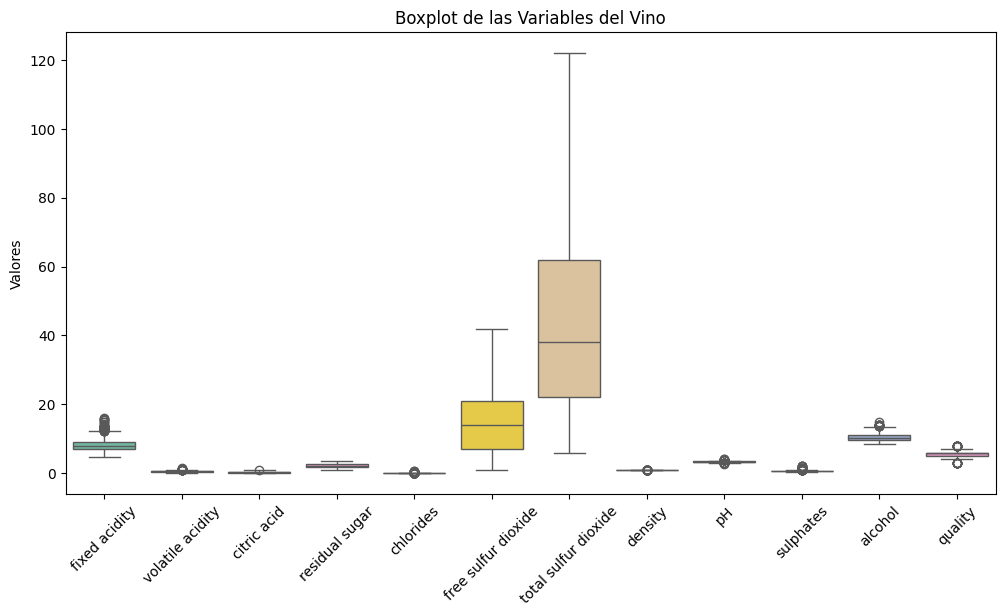

In [13]:
# Gráfico de Boxplot para todas las variables fisicoquímicas luego de normalizar valores atipicos
plt.figure(figsize=(12,6))
sns.boxplot(data=Datos, palette="Set2")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.title("Boxplot de las Variables del Vino")
plt.ylabel("Valores")
plt.show()

**3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.**

In [14]:
# Filtrar solo los vinos con calidad 5 o 6, ya que el dataset esta bastante desbalanceado y las otras calidades no seran correctamente medidas y afectaran el modelo
Datos = Datos[(Datos['quality'] == 5) | (Datos['quality'] == 6)]


**4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo**

In [15]:
# Separar variables predictoras (X) y la variable objetivo (y)
X = Datos.drop(columns=["quality"])  # Suponiendo que 'quality' es la variable objetivo
Y = Datos["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=13, stratify=Y)

print(f"Nueva forma de X_train: {X_train.shape}")
print(f"Nueva forma de X_test: {X_test.shape}")

Nueva forma de X_train: (1055, 11)
Nueva forma de X_test: (264, 11)


**5. Entrenar el modelo configurando los diferentes hiperparámetros.**

[Text(0.5960697309870551, 0.9705882352941176, 'x[10] <= 10.25\ngini = 0.499\nsamples = 1055\nvalue = [545, 510]'),
 Text(0.3424731998381877, 0.9117647058823529, 'x[9] <= 0.575\ngini = 0.442\nsamples = 616\nvalue = [413, 203]'),
 Text(0.4692714654126214, 0.9411764705882353, 'True  '),
 Text(0.1476537216828479, 0.8529411764705882, 'x[10] <= 9.75\ngini = 0.32\nsamples = 260\nvalue = [208, 52]'),
 Text(0.1011326860841424, 0.7941176470588235, 'x[8] <= 3.54\ngini = 0.253\nsamples = 175\nvalue = [149, 26]'),
 Text(0.09466019417475728, 0.7352941176470589, 'x[7] <= 1.0\ngini = 0.232\nsamples = 172\nvalue = [149.0, 23.0]'),
 Text(0.08818770226537216, 0.6764705882352942, 'x[4] <= 0.08\ngini = 0.217\nsamples = 170\nvalue = [149, 21]'),
 Text(0.059870550161812294, 0.6176470588235294, 'x[7] <= 0.997\ngini = 0.33\nsamples = 72\nvalue = [57, 15]'),
 Text(0.042071197411003236, 0.5588235294117647, 'x[0] <= 7.95\ngini = 0.423\nsamples = 46\nvalue = [32, 14]'),
 Text(0.025889967637540454, 0.5, 'x[2] <= 0.

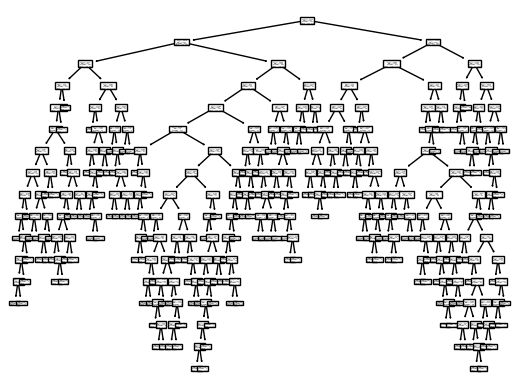

In [17]:
modelo_arbol = DecisionTreeClassifier(max_depth=20)

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)
plot_tree(modelo_arbol)

**6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.**

In [18]:
# Predicciones en el conjunto de prueba
Prediccion = modelo_arbol.predict(X_test)

# Reporte de Clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, Prediccion))



Reporte de Clasificación:
               precision    recall  f1-score   support

           5       0.74      0.74      0.74       136
           6       0.72      0.72      0.72       128

    accuracy                           0.73       264
   macro avg       0.73      0.73      0.73       264
weighted avg       0.73      0.73      0.73       264



**7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.**

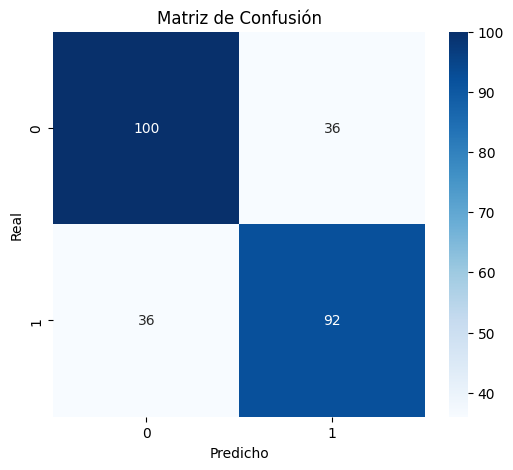

In [19]:
# Matriz de Confusión
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, Prediccion), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

**8. Interpretar, analizar y documentar los resultados obtenidos.**